## Prediction of Default Credit Cards-Part 2

### Content:

1) Handling the imbalance data Using OverSampling, undersampling and combination of both technique.<br>
2) Checking the recall/sensitivity for both the models .i.e. Logistics regression model and regression tress model.<br>
3) Feature selection using the inbuilt functions from the given packages(Random forest,boruta) and Hyper parameter tuning(manual and automated).<br>
4) Rerunning the model after feature selection and tuning, to check if there is an improvement in the acccuracy of our model or not.<br>

In [145]:
## Loading all the packages

library(caTools)        # for splitting the test and train dataset
library(ROSE)           # loading the ROSE package for sampling technique
library(ROCR)           # to check performance metrics
library(randomForest)   # for random forest model
library(ggplot2)        # for visualization
library(lattice)         
library(caret)          # for confusion matrix function 
install.packages("Boruta")
library(Boruta)         # Feature selection using boruta package


Warning message:
"package 'lattice' is in use and will not be installed"


package 'Boruta' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\LENOVO\AppData\Local\Temp\RtmpEPYg5w\downloaded_packages


In [146]:
## Reading the cleaned dataset which we have used in part 1

setwd("C:/Users/LENOVO/Downloads")
data2 <- read.csv("data2.csv")
head(data2,10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
3,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
5,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
7,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
8,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
9,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
10,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [147]:
colnames(data2)

[1] "LIMIT_BAL"       "SEX"             "EDUCATION"       "MARRIAGE"       
 [5] "AGE"             "PAY_0"           "PAY_2"           "PAY_3"          
 [9] "PAY_4"           "PAY_5"           "PAY_6"           "BILL_AMT1"      
[13] "BILL_AMT2"       "BILL_AMT3"       "BILL_AMT4"       "BILL_AMT5"      
[17] "BILL_AMT6"       "PAY_AMT1"        "PAY_AMT2"        "PAY_AMT3"       
[21] "PAY_AMT4"        "PAY_AMT5"        "PAY_AMT6"        "default_payment"

### As the Data is imbalance, we will use Undersampling, OverSampling techniques to check which model gives the higher accuracy and will proceed with that method.

### Splitting the dataset into training and test data for logistic model building

In [148]:
set.seed(123)
split1 <- sample.split(data2$default_payment , SplitRatio = 0.70)
training_set1 = subset(data2, split1 == TRUE)
test_set1 = subset(data2, split1 == FALSE)

#### UnderSampling Technique

In [149]:
table(training_set1$default_payment)
data_balanced_under <- ovun.sample(default_payment ~ ., data = training_set1, method = "under", N = 9290, seed = 1)$data
table(data_balanced_under$default_payment)


    0     1 
16354  4645 


   0    1 
4645 4645 

In [150]:
#Building the model

model_logistic_under <- glm(default_payment~.,data = data_balanced_under,family = "binomial")

In [151]:
#Predicting the dataset

p2 <- predict(model_logistic_under, test_set1 , type = 'response')
pred2 <- ifelse(p2>0.50,1,0)
tab2 <- table(Predicted = pred2, Actual = test_set1$default_payment)
tab2
1-(1 - sum(diag(tab2))/sum(tab2))
#recall value is 71.5%

         Actual
Predicted    0    1
        0 5012  748
        1 1997 1243

[1] 0.695

In [9]:
res <- predict(model_logistic_under,training_set1,type="response")
ROCRPRED <- prediction(res,training_set1$default_payment)
ROCRPEF <- performance(ROCRPRED,"tpr","fpr")
ROCRPEF <- performance(ROCRPRED,"acc")
max <- which.max(slot(ROCRPEF,"y.values")[[1]])
acc <- slot(ROCRPEF,"x.values")[[1]][max]  #max x axis cutoff
pp <- slot(ROCRPEF,"y.values")[[1]][max]
print(c(Accuracy=pp,Cutoff=acc))

   Accuracy Cutoff.5926 
  0.8169437   0.6843254 


**OverSampling Technique**

In [154]:
data_balanced_over <- ovun.sample(default_payment~ ., data =training_set1, method = "over",N =32708)$data
table(data_balanced_over$default_payment)


    0     1 
16354 16354 

In [155]:
#building the model

model_logistic <- glm(default_payment~.,data = data_balanced_over,family = "binomial")

#predicting the model
p2 <- predict(model_logistic, test_set1 , type = 'response')
pred2 <- ifelse(p2>0.50,1,0)
tab2 <- table(Predicted = pred2, Actual = test_set1$default_payment)
tab2
1-(1 - sum(diag(tab2))/sum(tab2))
#recall value is 71%

         Actual
Predicted    0    1
        0 4978  735
        1 2031 1256

[1] 0.6926667

In [13]:
res <- predict(model_logistic ,training_set1,type="response")
ROCRPRED <- prediction(res,training_set1$default_payment)
ROCRPEF <- performance(ROCRPRED,"tpr","fpr")
ROCRPEF <- performance(ROCRPRED,"acc")
max <- which.max(slot(ROCRPEF,"y.values")[[1]])
acc <- slot(ROCRPEF,"x.values")[[1]][max]  #max x axis cutoff
pp <- slot(ROCRPEF,"y.values")[[1]][max]
print(c(Accuracy=pp,Cutoff=acc))

    Accuracy Cutoff.20881 
   0.8168008    0.6826678 


### In this technique we are using both over and under sampling combine

In [156]:
table(training_set1$default_payment)
data_balanced_both <- ovun.sample(default_payment  ~ ., data = training_set1, method = "both", p=0.5,N=20999,seed = 1)$data
table(data_balanced_both$default_payment)


    0     1 
16354  4645 


    0     1 
10557 10442 

In [157]:
model_logistic_both <- glm(default_payment~.,data = data_balanced_both,family = "binomial")
summary(model_logistic)


Call:
glm(formula = default_payment ~ ., family = "binomial", data = data_balanced_over)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2919  -1.0684   0.0435   1.0595   3.3217  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.389e-01  9.527e-02   5.657 1.54e-08 ***
LIMIT_BAL   -7.813e-07  1.231e-07  -6.346 2.20e-10 ***
SEX         -1.123e-01  2.467e-02  -4.554 5.26e-06 ***
EDUCATION   -7.555e-02  1.748e-02  -4.323 1.54e-05 ***
MARRIAGE    -1.628e-01  2.530e-02  -6.433 1.25e-10 ***
AGE          6.947e-03  1.459e-03   4.760 1.93e-06 ***
PAY_0        5.174e-01  1.374e-02  37.645  < 2e-16 ***
PAY_2        9.757e-02  1.624e-02   6.008 1.87e-09 ***
PAY_3        7.926e-02  1.794e-02   4.419 9.93e-06 ***
PAY_4       -2.240e-02  1.977e-02  -1.133 0.257177    
PAY_5        9.616e-02  2.146e-02   4.482 7.41e-06 ***
PAY_6       -7.735e-02  1.805e-02  -4.286 1.82e-05 ***
BILL_AMT1   -6.540e-06  8.366e-07  -7.818 5.38e-15 ***
BILL_AMT2  

In [165]:
p2 <- predict(model_logistic_both, test_set1 , type = 'response')
pred2 <- ifelse(p2>0.50,1,0)
tab2 <- table(Predicted = pred2, Actual = test_set1$default_payment)
tab2
1-(1 - sum(diag(tab2))/sum(tab2))

         Actual
Predicted    0    1
        0 5005  737
        1 2004 1254

[1] 0.6954444

In [159]:
res <- predict(model_logistic_both ,training_set1,type="response")
ROCRPRED <- prediction(res,training_set1$default_payment)
ROCRPEF <- performance(ROCRPRED,"tpr","fpr")


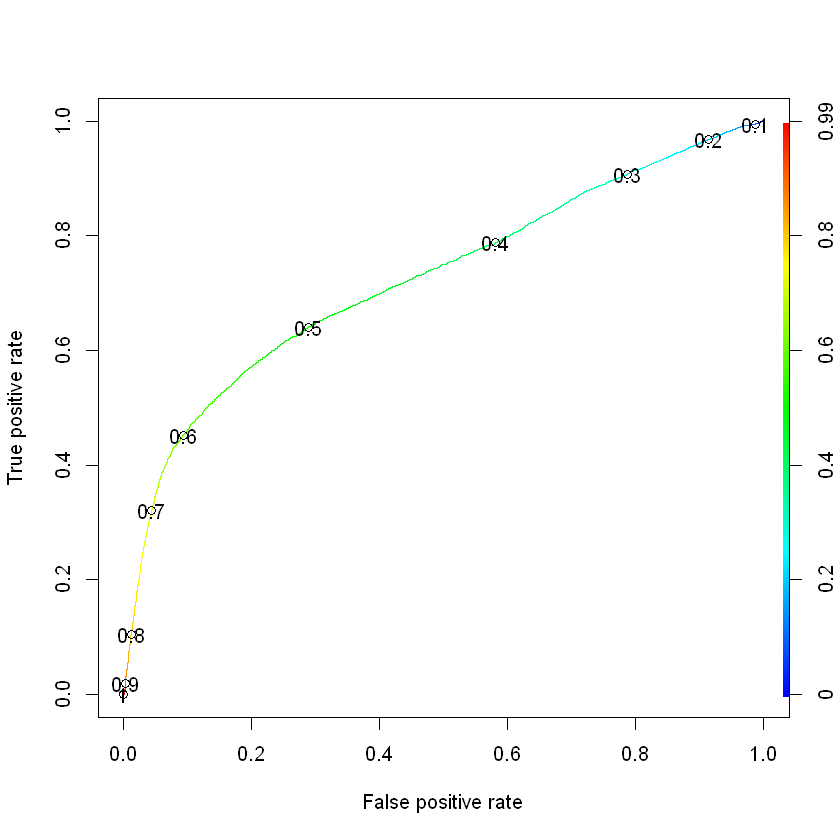

In [160]:
plot(ROCRPEF,colorize=TRUE,print.cutoffs.at=seq(0.1,by=0.1))

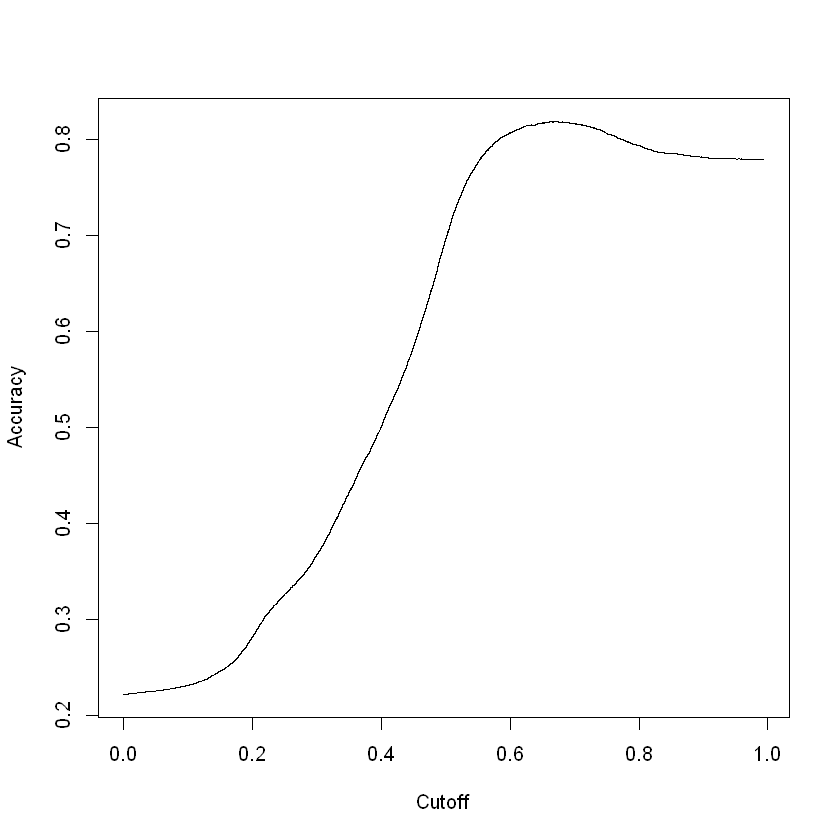

In [161]:
ROCRPEF <- performance(ROCRPRED,"acc")
plot(ROCRPEF)

In [162]:
max <- which.max(slot(ROCRPEF,"y.values")[[1]])
acc <- slot(ROCRPEF,"x.values")[[1]][max]  #max x axis cutoff
pp <- slot(ROCRPEF,"y.values")[[1]][max]
print(c(Accuracy=pp,Cutoff=acc)) 

    Accuracy Cutoff.14436 
   0.8185628    0.6717736 


Area under the curve (AUC): 0.672

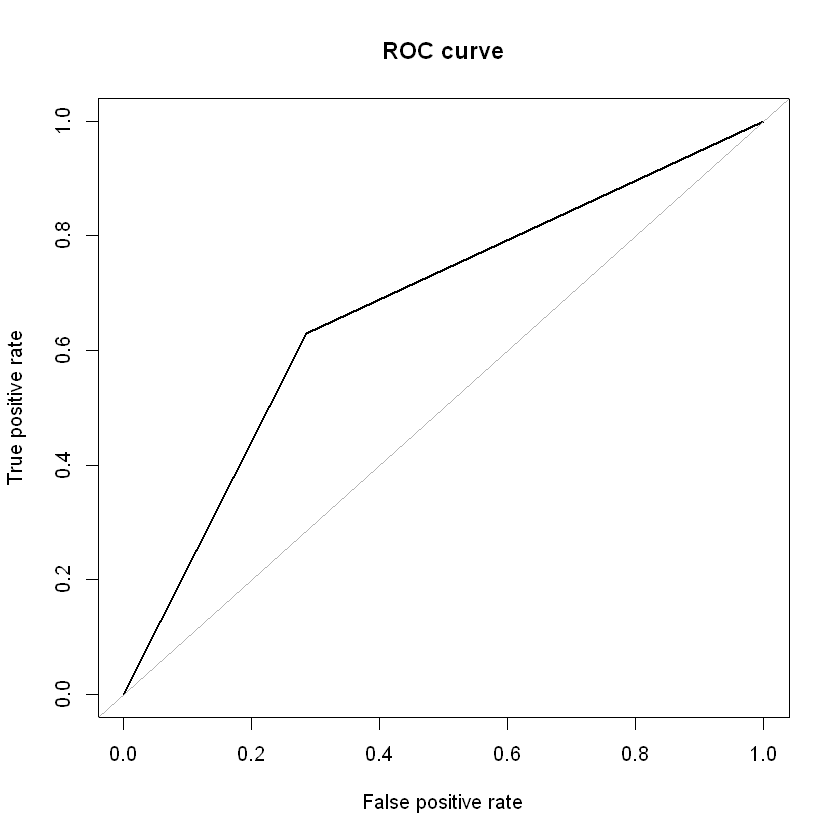

In [163]:
 roc.curve(test_set1$default_payment, pred2)

#### From the above Cases we can see that, accuracy for all the models are almost same but the last model has slightly higher accuracy. 

## Random Forest

In [166]:
data3 <- data2
data3$default_payment <- as.factor(data2$default_payment)

In [167]:
split_random <- sample.split(data3$default_payment , SplitRatio = 0.70)
training_set_random = subset(data3, split_random == TRUE)
test_set_random = subset(data3, split_random == FALSE)

#### UnderSampling technique

In [168]:
data_balanced_underrf <- ovun.sample(default_payment ~ ., data = training_set_random, method = "under", N = 9290, seed = 1)$data
table(data_balanced_underrf$default_payment)


rf_under <- randomForest(default_payment~.,data = data_balanced_underrf,importance=TRUE,mtry=4,ntree=501)
print(rf_under)


   0    1 
4645 4645 


Call:
 randomForest(formula = default_payment ~ ., data = data_balanced_underrf,      importance = TRUE, mtry = 4, ntree = 501) 
               Type of random forest: classification
                     Number of trees: 501
No. of variables tried at each split: 4

        OOB estimate of  error rate: 29%
Confusion matrix:
     0    1 class.error
0 3566 1079   0.2322928
1 1615 3030   0.3476857


In [169]:
p2 <- predict(rf_under, test_set_random )
tab2 <- table(p2, Actual = test_set_random$default_payment)
tab2
1-(1 - sum(diag(tab2))/sum(tab2))
#recall--0.77

   Actual
p2     0    1
  0 5379  736
  1 1630 1255

[1] 0.7371111

In [170]:
confusionMatrix(p2,test_set_random$default_payment)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5379  736
         1 1630 1255
                                          
               Accuracy : 0.7371          
                 95% CI : (0.7279, 0.7462)
    No Information Rate : 0.7788          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3427          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7674          
            Specificity : 0.6303          
         Pos Pred Value : 0.8796          
         Neg Pred Value : 0.4350          
             Prevalence : 0.7788          
         Detection Rate : 0.5977          
   Detection Prevalence : 0.6794          
      Balanced Accuracy : 0.6989          
                                          
       'Positive' Class : 0               
                        

#### Oversampling technique in Random forest

In [171]:


data_balanced_overrf <- ovun.sample(default_payment~ ., data =training_set_random, method = "over",N =32708)$data
table(data_balanced_overrf$default_payment)



    0     1 
16354 16354 

In [172]:
rf_over <- randomForest(default_payment~.,data =data_balanced_overrf  ,importance=TRUE,mtry=4,ntree=501)
print(rf_over)


Call:
 randomForest(formula = default_payment ~ ., data = data_balanced_overrf,      importance = TRUE, mtry = 4, ntree = 501) 
               Type of random forest: classification
                     Number of trees: 501
No. of variables tried at each split: 4

        OOB estimate of  error rate: 5.41%
Confusion matrix:
      0     1 class.error
0 14850  1504  0.09196527
1   267 16087  0.01632628


In [173]:
p2 <- predict(rf_over, test_set_random , type = 'response')
tab2 <- table(p2, Actual = test_set_random$default_payment)
tab2
1-(1 - sum(diag(tab2))/sum(tab2))

   Actual
p2     0    1
  0 6359 1113
  1  650  878

[1] 0.8041111

In [129]:
confusionMatrix(p2,test_set_random$default_payment)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 6359 1113
         1  650  878
                                          
               Accuracy : 0.8041          
                 95% CI : (0.7958, 0.8123)
    No Information Rate : 0.7788          
    P-Value [Acc > NIR] : 2.334e-09       
                                          
                  Kappa : 0.3799          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9073          
            Specificity : 0.4410          
         Pos Pred Value : 0.8510          
         Neg Pred Value : 0.5746          
             Prevalence : 0.7788          
         Detection Rate : 0.7066          
   Detection Prevalence : 0.8302          
      Balanced Accuracy : 0.6741          
                                          
       'Positive' Class : 0               
                        

### In this technique we are using both over and under sampling combine

In [174]:

table(training_set_random$default_payment)
data_balanced_bothrf <- ovun.sample(default_payment~ ., data =training_set_random, method = "both",N =20999)$data
table(data_balanced_bothrf$default_payment)




    0     1 
16354  4645 


    0     1 
10441 10558 

In [175]:
rf_both <- randomForest(default_payment~.,data =data_balanced_bothrf  ,importance=TRUE,mtry=4,ntree=501)
print(rf_both)


Call:
 randomForest(formula = default_payment ~ ., data = data_balanced_bothrf,      importance = TRUE, mtry = 4, ntree = 501) 
               Type of random forest: classification
                     Number of trees: 501
No. of variables tried at each split: 4

        OOB estimate of  error rate: 6.51%
Confusion matrix:
     0     1 class.error
0 9571   870  0.08332535
1  497 10061  0.04707331


In [176]:
p2 <- predict(rf_both, test_set_random , type = 'response')
tab2 <- table(p2, Actual = test_set_random$default_payment)
tab2
1-(1 - sum(diag(tab2))/sum(tab2))

   Actual
p2     0    1
  0 5986  898
  1 1023 1093

[1] 0.7865556

In [177]:
confusionMatrix(p2,test_set_random$default_payment)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5986  898
         1 1023 1093
                                         
               Accuracy : 0.7866         
                 95% CI : (0.7779, 0.795)
    No Information Rate : 0.7788         
    P-Value [Acc > NIR] : 0.038356       
                                         
                  Kappa : 0.3942         
                                         
 Mcnemar's Test P-Value : 0.004667       
                                         
            Sensitivity : 0.8540         
            Specificity : 0.5490         
         Pos Pred Value : 0.8696         
         Neg Pred Value : 0.5165         
             Prevalence : 0.7788         
         Detection Rate : 0.6651         
   Detection Prevalence : 0.7649         
      Balanced Accuracy : 0.7015         
                                         
       'Positive' Class : 0              
                                         

## Observations

1) Random forest model with **Under sampling technique**= OOB estimate of  error rate: 29% and sensitivity/recall is 77% <br>
2) Random forest model with **Over sampling technique**= OOB estimate of  error rate: 5.41% and sensitivity/recall is 92% <br>
3) Random forest model with **both sampling technique**= OOB estimate of  error rate: 6.51% and sensitivity/recall is 85% <br>


### The lowest error rate and higher recall value is from random forest with over sampling model. Hence we will proceed with this.

### Using the random forest model to check which all features are important

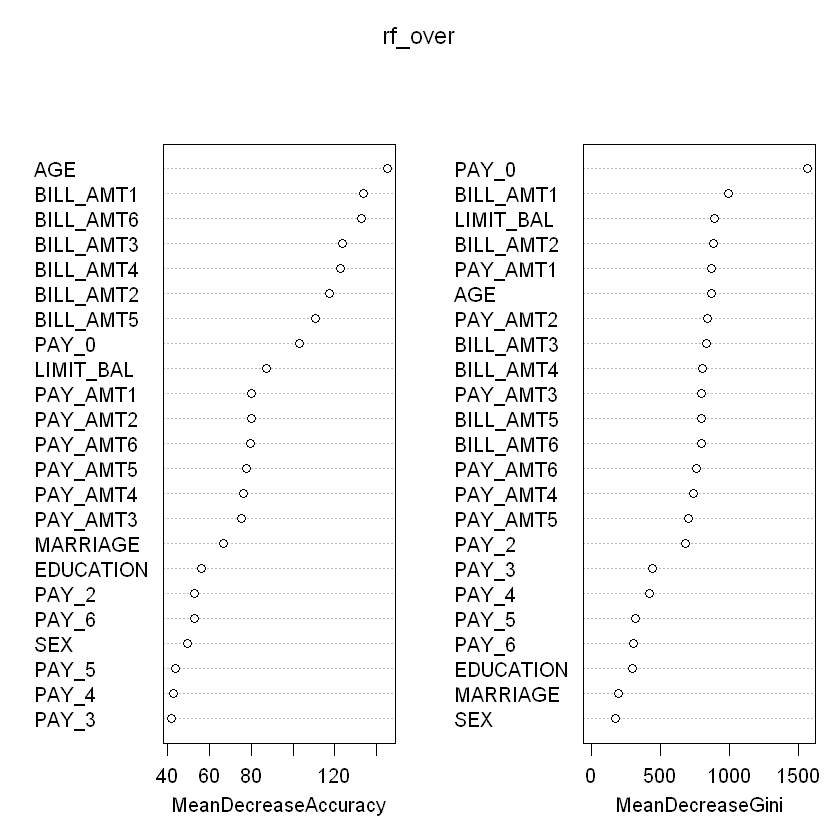

In [36]:
varImpPlot(rf_over)

In [60]:
importance(rf_over)

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
LIMIT_BAL,4.916027,87.95985,87.36338,892.0052
SEX,1.018916,49.35375,49.30526,168.5714
EDUCATION,4.041986,55.73557,56.07275,294.4187
MARRIAGE,6.290881,65.95422,66.56972,192.8543
AGE,8.761331,148.53888,145.23711,870.4632
PAY_0,106.202289,87.50479,102.98853,1564.8087
PAY_2,22.277440,52.03728,52.93882,677.6350
PAY_3,16.746020,40.68877,41.88942,437.2429
PAY_4,23.736559,40.72178,42.80925,421.9327
PAY_5,15.379853,42.76274,43.72202,315.9562


In [ ]:
## using boruta package for feature selections

In [40]:
boruta_output <- Boruta(default_payment~., data=na.omit(data_balanced_overrf), doTrace=0)  
names(boruta_output)
print(boruta_output)

Growing trees.. Progress: 69%. Estimated remaining time: 14 seconds.
Computing permutation importance.. Progress: 45%. Estimated remaining time: 37 seconds.
Computing permutation importance.. Progress: 91%. Estimated remaining time: 6 seconds.
Growing trees.. Progress: 68%. Estimated remaining time: 14 seconds.
Computing permutation importance.. Progress: 45%. Estimated remaining time: 37 seconds.
Computing permutation importance.. Progress: 92%. Estimated remaining time: 5 seconds.
Growing trees.. Progress: 69%. Estimated remaining time: 13 seconds.
Computing permutation importance.. Progress: 46%. Estimated remaining time: 36 seconds.
Computing permutation importance.. Progress: 92%. Estimated remaining time: 5 seconds.
Growing trees.. Progress: 67%. Estimated remaining time: 15 seconds.
Computing permutation importance.. Progress: 46%. Estimated remaining time: 36 seconds.
Computing permutation importance.. Progress: 90%. Estimated remaining time: 7 seconds.
Growing trees.. Progress

[1] "finalDecision" "ImpHistory"    "pValue"        "maxRuns"      
 [5] "light"         "mcAdj"         "timeTaken"     "roughfixed"   
 [9] "call"          "impSource"

Boruta performed 12 iterations in 20.41146 mins.
 23 attributes confirmed important: AGE, BILL_AMT1, BILL_AMT2,
BILL_AMT3, BILL_AMT4 and 18 more;
 No attributes deemed unimportant.


In [41]:
# Get significant variables including tentatives
boruta_signif <- getSelectedAttributes(boruta_output, withTentative = TRUE)
print(boruta_signif)  
attStats(boruta_output)

 [1] "LIMIT_BAL" "SEX"       "EDUCATION" "MARRIAGE"  "AGE"       "PAY_0"    
 [7] "PAY_2"     "PAY_3"     "PAY_4"     "PAY_5"     "PAY_6"     "BILL_AMT1"
[13] "BILL_AMT2" "BILL_AMT3" "BILL_AMT4" "BILL_AMT5" "BILL_AMT6" "PAY_AMT1" 
[19] "PAY_AMT2"  "PAY_AMT3"  "PAY_AMT4"  "PAY_AMT5"  "PAY_AMT6" 


,meanImp,medianImp,minImp,maxImp,normHits,decision
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
LIMIT_BAL,61.96833,61.26189,59.29634,66.64573,1,Confirmed
SEX,17.93916,17.65272,16.32742,19.88181,1,Confirmed
EDUCATION,22.97207,22.79910,20.55148,25.67502,1,Confirmed
MARRIAGE,21.98380,22.92776,18.43186,25.06443,1,Confirmed
AGE,64.01894,64.67416,56.43329,68.39550,1,Confirmed
PAY_0,86.92371,86.13600,84.77719,90.15140,1,Confirmed
PAY_2,45.14740,45.09901,43.46787,46.99118,1,Confirmed
PAY_3,37.13609,37.40773,34.95367,38.53725,1,Confirmed
PAY_4,37.88308,37.87526,36.27764,39.65920,1,Confirmed


In [42]:
# Do a tentative rough fix
roughFixMod <- TentativeRoughFix(boruta_output)
boruta_signif <- getSelectedAttributes(roughFixMod)
print(boruta_signif)

Warning message in TentativeRoughFix(boruta_output):
"There are no Tentative attributes! Returning original object."


 [1] "LIMIT_BAL" "SEX"       "EDUCATION" "MARRIAGE"  "AGE"       "PAY_0"    
 [7] "PAY_2"     "PAY_3"     "PAY_4"     "PAY_5"     "PAY_6"     "BILL_AMT1"
[13] "BILL_AMT2" "BILL_AMT3" "BILL_AMT4" "BILL_AMT5" "BILL_AMT6" "PAY_AMT1" 
[19] "PAY_AMT2"  "PAY_AMT3"  "PAY_AMT4"  "PAY_AMT5"  "PAY_AMT6" 


In [43]:
# Variable Importance Scores
imps <- attStats(roughFixMod)
imps2 = imps[imps$decision != 'Rejected', c('meanImp', 'decision')]
head(imps2[order(-imps2$meanImp), ])  # descending sort

,meanImp,decision
,<dbl>,<fct>
PAY_0,86.92371,Confirmed
BILL_AMT1,73.61813,Confirmed
BILL_AMT2,70.27596,Confirmed
BILL_AMT3,69.41636,Confirmed
BILL_AMT6,66.95598,Confirmed
BILL_AMT4,65.97252,Confirmed


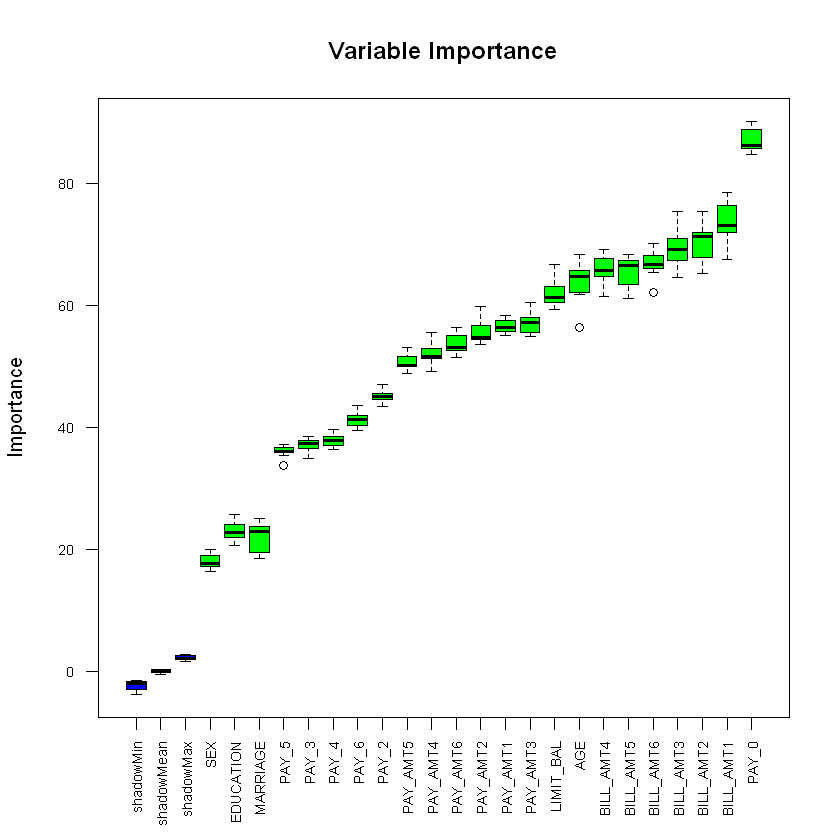

In [44]:
plot(boruta_output, cex.axis=.7, las=2, xlab="", main="Variable Importance")

#### Considering all the above methods, we will exclude the last 5 features that are PAY_2,PAY_3,PAY_4,PAY_5,PAY_6

### Hyper parameter tuning

1) We will tune the paramters of the model in order to see if the accuracy can be improve or not.

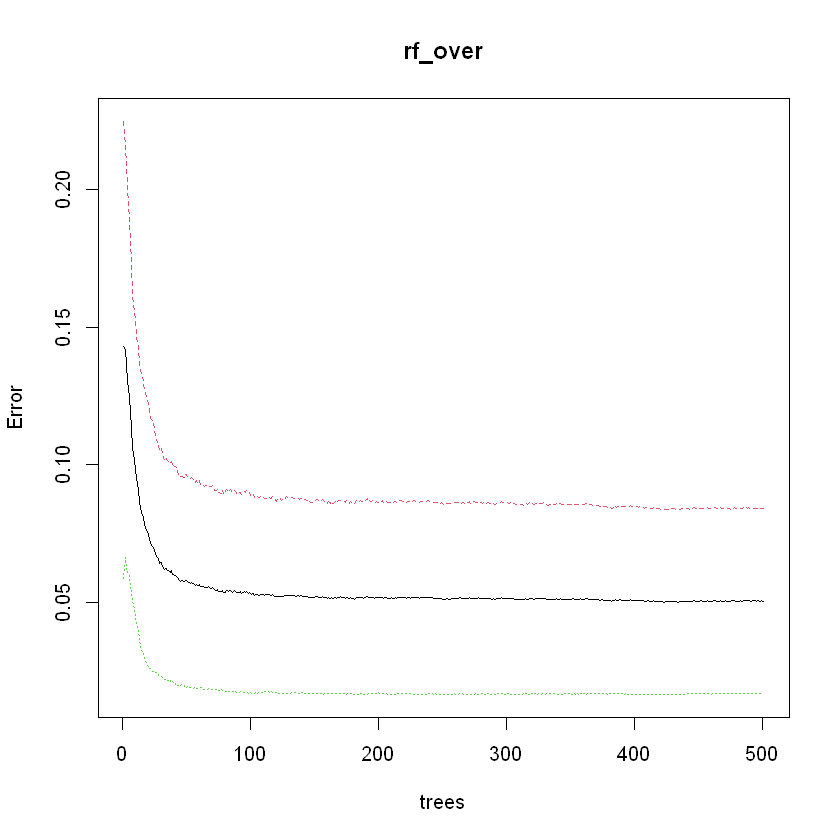

In [63]:
plot(rf_over) #error rate of rf

mtry = 4  OOB error = 18.15% 
Searching left ...
mtry = 8 	OOB error = 18.19% 
-0.002098636 0.05 
Searching right ...
mtry = 2 	OOB error = 18.28% 
-0.007082896 0.05 


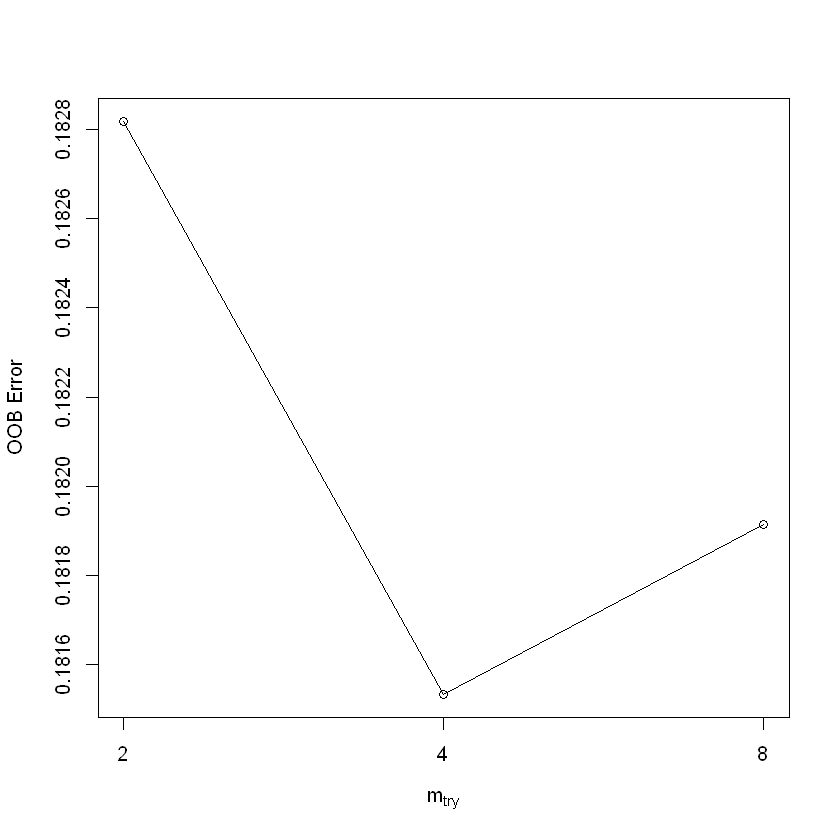

In [31]:
t <- tuneRF(training_set_random[,-24],training_set_random[,24],stepFactor=0.5
            ,plot=TRUE,ntreeTry=301
            ,trace=TRUE,improve=0.05) 

mtry = 4  OOB error = 18.15% 
Searching left ...
mtry = 8 	OOB error = 18.17% 
-0.0007869885 0.05 
Searching right ...
mtry = 2 	OOB error = 18.19% 
-0.002098636 0.05 


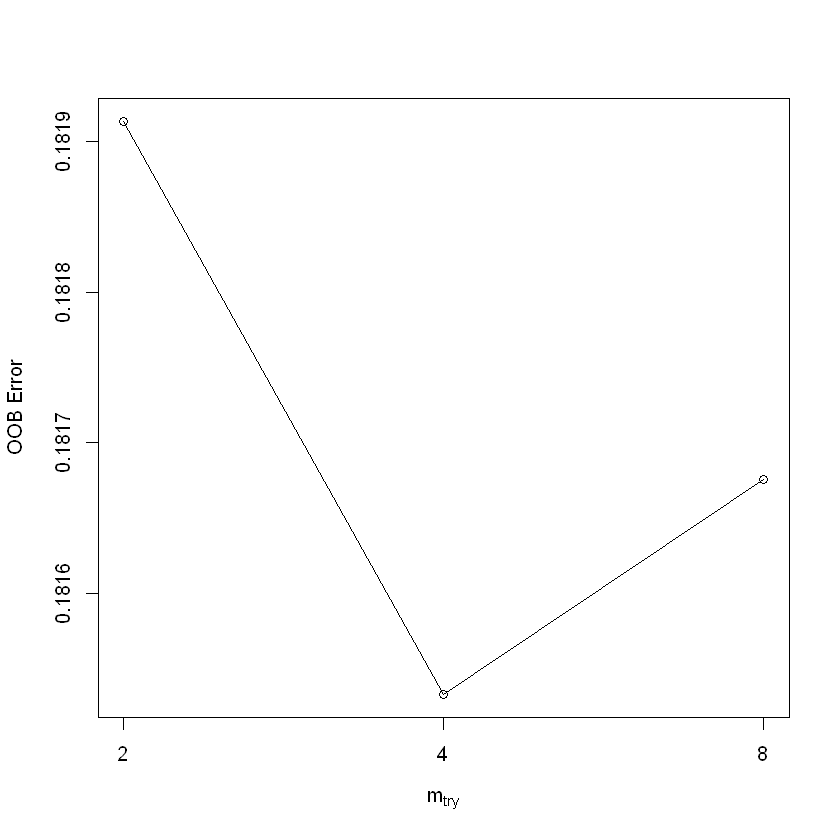

In [34]:
t <- tuneRF(training_set_random[,-24],training_set_random[,24],stepFactor=0.5
            ,plot=TRUE,ntreeTry=2906
            ,trace=TRUE,improve=0.05) 

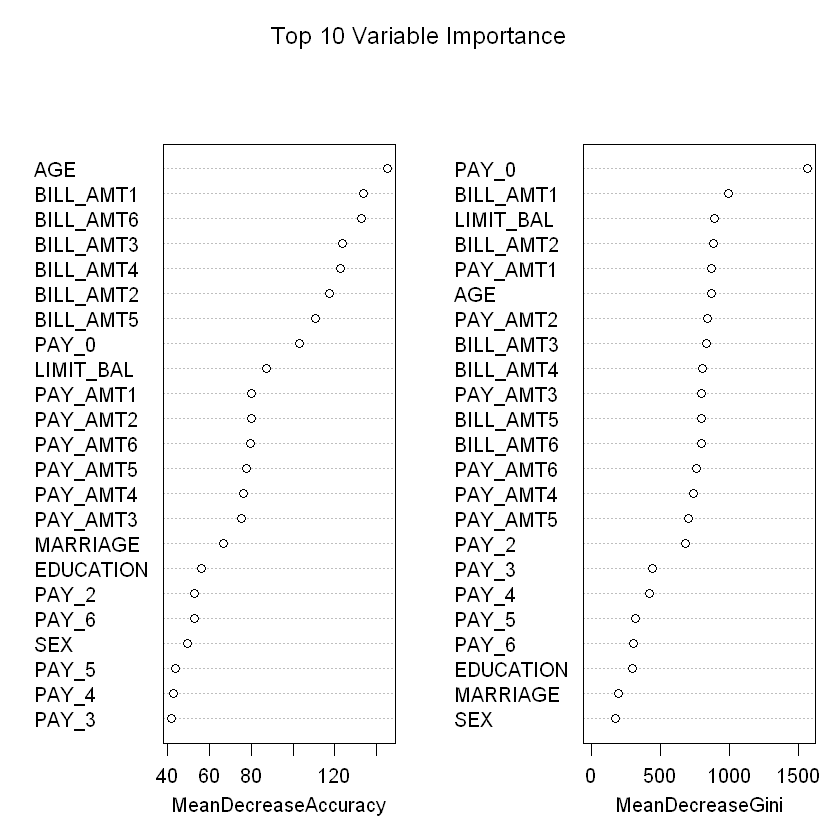

In [134]:
varImpPlot(rf_over,sort=T,n.var=23,main="Top 10 Variable Importance")

In [ ]:
## automated hyper parameter tuning

In [75]:
install.packages("mlr")
library(mlr)

package 'mlr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\LENOVO\AppData\Local\Temp\Rtmp4GiStn\downloaded_packages


Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.


Attaching package: 'mlr'


The following object is masked _by_ '.GlobalEnv':

    acc


The following object is masked from 'package:ROCR':

    performance


The following object is masked from 'package:caret':

    train




In [76]:
#create a task
traintask <- makeClassifTask(data=data_balanced_overrf,target = "default_payment")


In [83]:
rf <- makeLearner("classif.randomForest",predict.type="response",par.vals=list(ntree=floor(0.1*nrow(data_balanced_overrf)),
                 mtry=floor((ncol(data_balanced_overrf)-1)/3)))


In [97]:
rf <- makeLearner("classif.randomForest",predict.type="response",par.vals=list(ntree=floor(1000)),
                 mtry=floor((ncol(data_balanced_overrf)-1)/3)))

ERROR: Error in parse(text = x, srcfile = src): <text>:2:63: unexpected ')'
1: rf <- makeLearner("classif.randomForest",predict.type="response",par.vals=list(ntree=floor(1000)),
2:                  mtry=floor((ncol(data_balanced_overrf)-1)/3)))
                                                                 ^


In [84]:
rf$par.vals <- list(importance=TRUE)

In [79]:
rf_param <- makeParamSet(
             makeIntegerParam("ntree",lower=10,upper=floor(0.1*nrow(data_balanced_overrf))),
    makeIntegerParam("mtry",lower=floor((ncol(data_balanced_overrf)-1)/3),
                     upper=ncol(data_balanced_overrf)))

In [80]:
rancontrol <- makeTuneControlRandom(maxit=10L)


In [81]:
set_cv <- makeResampleDesc("CV",iters=3L)

In [96]:
#rf_tune <- tuneParams(learner=rf,
                      #resampling=set_cv,
                      #task=traintask,
                      #par.set=rf_param,
                      #control=rancontrol,
                      #measures=mmce)

[Tune] Started tuning learner classif.randomForest for parameter set:

         Type len Def         Constr Req Tunable Trafo
ntree integer   -   - 10 to 3.27e+03   -    TRUE     -
mtry  integer   -   -        7 to 24   -    TRUE     -

With control class: TuneControlRandom

Imputation value: 1

[Tune-x] 1: ntree=2906; mtry=15

[Tune-y] 1: mmce.test.mean=0.0808976; time: 25.6 min

[Tune-x] 2: ntree=2123; mtry=14

[Tune-y] 2: mmce.test.mean=0.0809281; time: 18.7 min

[Tune-x] 3: ntree=3086; mtry=18

[Tune-y] 3: mmce.test.mean=0.0810810; time: 28.3 min

[Tune-x] 4: ntree=707; mtry=8

[Tune-y] 4: mmce.test.mean=0.0826097; time: 5.9 min

[Tune-x] 5: ntree=1616; mtry=24

Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"
Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"
[Tune-y] 5: mmce.test.mean=0.0816619;

### Now that we have tuned the paramters and selected the importance features for our model our model. Selected no of trees=301 and mtry=4

### Let's see if we can increase the accuracy of the model after making some changes.

In [180]:
rf_over <- randomForest(default_payment~.-PAY_2-PAY_6-PAY_5-PAY_4-PAY_3,data =data_balanced_overrf  ,importance=TRUE,mtry=4,ntree=301)
print(rf_over)


Call:
 randomForest(formula = default_payment ~ . - PAY_2 - PAY_6 -      PAY_5 - PAY_4 - PAY_3, data = data_balanced_overrf, importance = TRUE,      mtry = 4, ntree = 301) 
               Type of random forest: classification
                     Number of trees: 301
No. of variables tried at each split: 4

        OOB estimate of  error rate: 4.95%
Confusion matrix:
      0     1 class.error
0 15009  1345  0.08224288
1   275 16079  0.01681546


In [181]:
p2 <- predict(rf_over, test_set_random , type = 'response')
tab2 <- table(p2, Actual = test_set_random$default_payment)
tab2
1-(1 - sum(diag(tab2))/sum(tab2))
#recall = 0.92

   Actual
p2     0    1
  0 6439 1142
  1  570  849

[1] 0.8097778

In [182]:
confusionMatrix(p2,test_set_random$default_payment)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 6439 1142
         1  570  849
                                          
               Accuracy : 0.8098          
                 95% CI : (0.8015, 0.8178)
    No Information Rate : 0.7788          
    P-Value [Acc > NIR] : 3.075e-13       
                                          
                  Kappa : 0.3847          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9187          
            Specificity : 0.4264          
         Pos Pred Value : 0.8494          
         Neg Pred Value : 0.5983          
             Prevalence : 0.7788          
         Detection Rate : 0.7154          
   Detection Prevalence : 0.8423          
      Balanced Accuracy : 0.6725          
                                          
       'Positive' Class : 0               
                        

## Observations

1) We can observe that the sensitivity/recall for random forest using oversampling technique is higher than the rest of the models and Logistics model that we have used.<br> 
2) After the hyper parameter tuning and feature selection, the sensitivity value has slighly increased but did not made a big impact.( 0.9073 to 0.9187)<br>

Therefore our final model has the recall value around 92%. 